An implementation of CODI is provided in the `pycodi.py` file and as a python package (`pip install pycodi`). This Jupyter Notebook provides a basic demonstration of how this CODI implementation can be used. The usage is demonstrated on blood-based infrared (IR) spectral measurements, as performed in our study.

In [1]:
# import helper packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import CODI implementation
from pycodi import CODI

# Data loading

As an example input training dataset, below we load in blood-based IR absorption spectra of different individuals.

These spectral measurements will be used as a seed input to CODI.

In [2]:
X = pd.read_csv('data/training_data.csv', index_col=0) # load spectral measurements - ADJUST to load in your own seed data
X.columns = X.columns.astype(float)
y = X.index # sample labels
display(X) # loaded DataFrame of measurements - with observations in rows and features in columns.

,1000.816143,1002.742871,1004.669599,1006.596328,1008.523056,1010.449784,1012.376512,1014.303240,1016.229968,1018.156696,...,2981.492634,2983.419362,2985.346091,2987.272819,2989.199547,2991.126275,2993.053003,2994.979731,2996.906459,2998.833187
subject_id,,,,,,,,,,,,,,,,,,,,,
0,0.001284,0.001519,0.001805,0.002139,0.002493,0.002821,0.003086,0.003284,0.003452,0.003631,...,0.019433,0.018522,0.017658,0.016850,0.016117,0.015466,0.014898,0.014414,0.014021,0.013728
0,0.001020,0.001250,0.001543,0.001882,0.002232,0.002572,0.002865,0.003095,0.003292,0.003491,...,0.018859,0.017951,0.017087,0.016279,0.015532,0.014856,0.014262,0.013752,0.013334,0.013010
0,0.001149,0.001406,0.001720,0.002074,0.002431,0.002768,0.003050,0.003264,0.003443,0.003623,...,0.018907,0.018007,0.017146,0.016334,0.015583,0.014900,0.014297,0.013779,0.013351,0.013021
0,0.000971,0.001218,0.001534,0.001897,0.002273,0.002621,0.002906,0.003125,0.003314,0.003515,...,0.018473,0.017546,0.016655,0.015818,0.015045,0.014349,0.013738,0.013210,0.012776,0.012441
1,0.000819,0.001021,0.001282,0.001602,0.001948,0.002272,0.002538,0.002740,0.002907,0.003079,...,0.018761,0.017850,0.016983,0.016172,0.015424,0.014748,0.014151,0.013639,0.013219,0.012892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,0.001210,0.001428,0.001690,0.002005,0.002348,0.002668,0.002934,0.003135,0.003299,0.003462,...,0.019612,0.018709,0.017847,0.017042,0.016302,0.015636,0.015050,0.014546,0.014137,0.013832
43,0.001113,0.001341,0.001629,0.001965,0.002321,0.002653,0.002928,0.003144,0.003327,0.003515,...,0.019043,0.018098,0.017195,0.016346,0.015565,0.014865,0.014247,0.013710,0.013269,0.012934
43,0.000972,0.001176,0.001430,0.001742,0.002074,0.002386,0.002658,0.002875,0.003060,0.003258,...,0.019349,0.018429,0.017543,0.016705,0.015929,0.015226,0.014605,0.014070,0.013632,0.013296


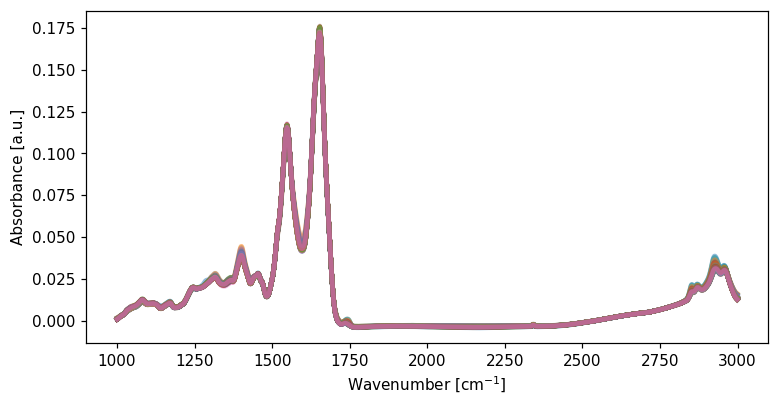

In [3]:
# visualization of the loaded experimental IR spectra of different individuals
plt.figure(figsize=(8, 4), dpi=110)
plt.plot(X.T, linewidth=3, alpha=0.5)
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Absorbance [a.u.]')
plt.show()

As an example of characterizing variability, below we load in IR absorption spectra of blood-based quality control (QC) samples.

A large volume of sample (pooled from thousands of individuals) was purchased from a commercial provider and aliquoted into small tubes.

These QC samples were handled by different operators and freezer-stored for varying time periods, and IR spectral measurements were captured over several years.

In [4]:
QC = pd.read_csv('data/qc_data.csv', index_col=0) # measurements of baseline sampling - ADJUST to load in your own calibration data
QC.columns = QC.columns.astype(float)
display(QC) # loaded DataFrame of QC measurements - with observations in rows and features in columns (same format as variable X).

,1000.816143,1002.742871,1004.669599,1006.596328,1008.523056,1010.449784,1012.376512,1014.303240,1016.229968,1018.156696,...,2981.492634,2983.419362,2985.346091,2987.272819,2989.199547,2991.126275,2993.053003,2994.979731,2996.906459,2998.833187
0,0.000139,0.000297,0.000515,0.000789,0.001113,0.001444,0.001726,0.001948,0.002153,0.002383,...,0.018458,0.017506,0.016594,0.015734,0.014929,0.014189,0.013519,0.012927,0.012431,0.012032
1,0.000062,0.000237,0.000442,0.000702,0.001015,0.001336,0.001624,0.001872,0.002101,0.002339,...,0.018363,0.017415,0.016498,0.015627,0.014808,0.014057,0.013391,0.012809,0.012309,0.011898
2,0.000056,0.000211,0.000417,0.000683,0.001008,0.001349,0.001660,0.001914,0.002121,0.002333,...,0.018460,0.017515,0.016606,0.015740,0.014931,0.014194,0.013525,0.012933,0.012434,0.012026
3,0.000059,0.000215,0.000431,0.000711,0.001034,0.001363,0.001659,0.001902,0.002114,0.002332,...,0.018457,0.017512,0.016599,0.015733,0.014926,0.014183,0.013517,0.012933,0.012433,0.012023
4,0.000029,0.000180,0.000379,0.000649,0.000974,0.001309,0.001610,0.001856,0.002071,0.002297,...,0.018413,0.017463,0.016543,0.015667,0.014848,0.014101,0.013437,0.012856,0.012361,0.011949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577,-0.001272,-0.001097,-0.000876,-0.000579,-0.000218,0.000152,0.000471,0.000726,0.000962,0.001217,...,0.016939,0.015903,0.014895,0.013939,0.013051,0.012236,0.011496,0.010835,0.010261,0.009777
2578,-0.001292,-0.001115,-0.000888,-0.000587,-0.000228,0.000144,0.000471,0.000729,0.000970,0.001229,...,0.016963,0.015924,0.014921,0.013965,0.013071,0.012252,0.011512,0.010851,0.010284,0.009807
2579,-0.001239,-0.001065,-0.000822,-0.000506,-0.000151,0.000213,0.000534,0.000788,0.001015,0.001261,...,0.017008,0.015988,0.015003,0.014059,0.013161,0.012336,0.011598,0.010940,0.010376,0.009904
2580,-0.001274,-0.001076,-0.000823,-0.000516,-0.000180,0.000164,0.000481,0.000755,0.001018,0.001284,...,0.017042,0.016021,0.015036,0.014093,0.013208,0.012391,0.011649,0.010986,0.010412,0.009930


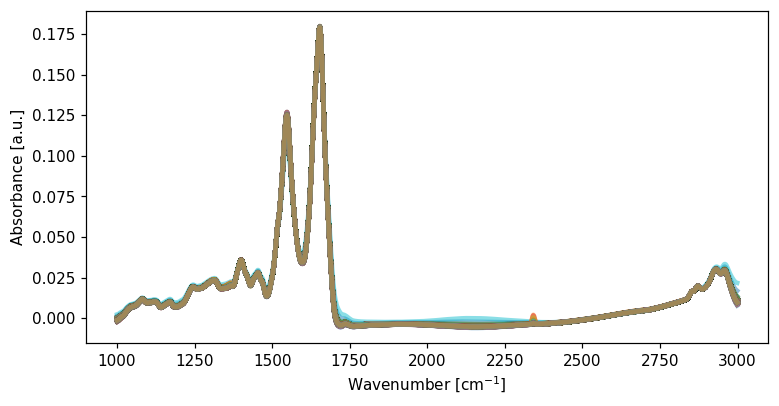

In [5]:
# visualization of the loaded experimental QC IR spectra
plt.figure(figsize=(8, 4), dpi=110)
plt.plot(QC.T, linewidth=3, alpha=0.5)
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Absorbance [a.u.]')
plt.show()

# Demonstration of CODI usage

### Create the variability calibration datasets and functions

The CODI implementation accepts two formats to describe the _a priori_ variance: functions that can be run to generate random numerical vectors that describe a source of variance or empirical datasets that contain the source of variance. Below, we demonstrate the usage of both formats.

As an example, we introduce two sources of potential measurement variance: 
1. The variability characteristics of the QC measurements, described by an empirical dataset.
2. A level of measurement white noise, described by a random Gaussian function with a constant variance across the features.

These two sources of variance which define functions $f_1$ and $f_2$ will be introduced to the input training seed measurements $\boldsymbol{x}_i$ by calling the CODI implementation: 

$$\boldsymbol{Y} = \boldsymbol{x}_i + f_1 + f_2$$

In [6]:
# calibration dataset of quality control variability (based on equation 2 of the supplementary methods of our study)
qc_variability = QC.values - np.tile(QC.mean(axis=0), (QC.shape[0], 1))

# additional white noise which takes the form of a random function (mean=0, std=1e-5).
# each run of white_noise() returns a random Gaussian vector of length number of discrete wavenumbers (n_features=X.shape[1]).
white_noise = lambda: np.random.normal(0, 1e-5, X.shape[1]) 

# defining example sources of sample variability to be utilized as the functions f_1 and f_2 (described in equation 1 of the supplementary methods of our study)
variability_sources = [qc_variability, white_noise]

### Apply CODI to generate synthetic samples

In [7]:
# initialize an instance of CODI
codi = CODI(variability_sources=variability_sources, random_state=42)
# generate samples based on the input seed measurements
X_gen, y_gen = codi.generate_samples(X=X.values, y=y.values, seed_strategy='all', n_per_seed=50) # creates 50 synthetic samples for each observation in X.
X_gen.shape

(8850, 1038)

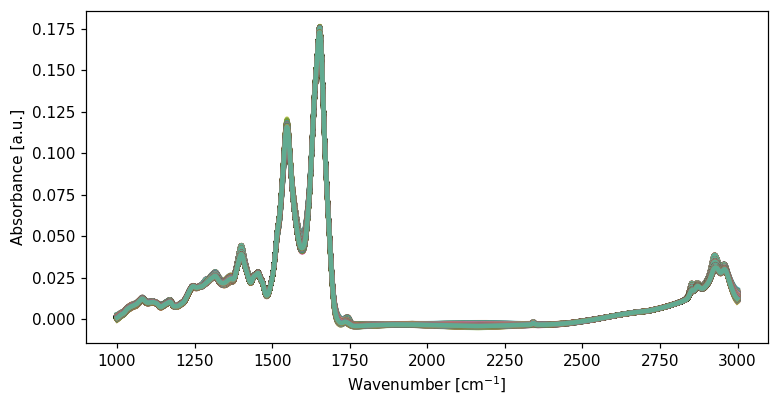

In [8]:
# Visualization of the synthetic IR spectra
plt.figure(figsize=(8, 4), dpi=110)
plt.plot(X.columns, X_gen.T, linewidth=3, alpha=0.5)
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Absorbance [a.u.]')
plt.show()

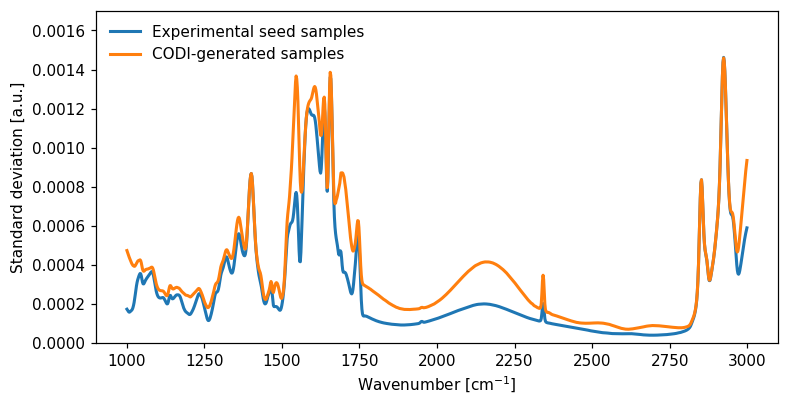

In [9]:
# comparison between the standard deviation of the original seed measurements and the generated synthetic measurements
plt.figure(figsize=(8, 4), dpi=110)
plt.plot(X.columns, X.std(axis=0), linewidth=2, label='Experimental seed samples')
plt.plot(X.columns, X_gen.std(axis=0), linewidth=2, label='CODI-generated samples')
plt.xlabel('Wavenumber [cm$^{-1}$]')
plt.ylabel('Standard deviation [a.u.]')
plt.ylim(0, 0.0017)
plt.legend(frameon=False)
plt.show()

Through CODI, a large dataset was generated that contains a higher level of variance than the original seed measurements. 


The generated measurements and corresponding labels (X_gen and y_gen) can then be passed to train a (supervised) ML classifier for subsequent analysis.